In [1]:
pip install -r requirement.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torchvision.transforms import v2
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [3]:
### 1. Image Dataset Extraction and Preprocessing

## 1.1 Getting training and testing dataset directory
## 1.2 Function of extracting dataset images
## 1.3 Extracting dataset images
## 1.4 Image size and total image count
## 1.5 Function of label count for 1.7
## 1.6 Function of graph plot for 1.7
## 1.7 Dataset and label distribution graph
## 1.8 Showcase first image of train and testing dataset
## 1.9 Function of extracting first n images of all emotions for 1.10
## 1.10 Showcase grid of example images of all emotion labels
## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12
## 1.12 Showcase detected face comparison with original image 
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14
## 1.14 Showcase comparison between original image and cropped detected face image
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25
## 1.18 Showcase of comparisons between original image and brightness adjusted image
## 1.19 Showcase of comparisons between original image and contrast adjusted image
## 1.20 Showcase 10 Transformed Image With Combination of All Transformation 
## 1.21 Whole Function for Entire Preprocessing Step
## 1.22 Testing for Whole Preprocess Image for The Dataset
## 1.23 Testing for image saving mechanism
## 1.24 Preprocess and Save Images into Dataset as Tensor

In [4]:
## 1.1 Getting training and testing dataset directory

current_wd = os.getcwd()

train_directory = os.path.join(current_wd, "raw_data", "train")

test_directory = os.path.join(current_wd, "raw_data", "test")

print(train_directory)
print(test_directory)

c:\Users\ADMIN\Documents\XIAMEN\Github Projects\DL-Assignment\raw_data\train
c:\Users\ADMIN\Documents\XIAMEN\Github Projects\DL-Assignment\raw_data\test


In [5]:
## 1.2 Function of extracting dataset images

def datasetLoader(root):
    imgPaths = []
    labels = []

    for label in os.listdir(root):
        emotionDir = os.path.join(root, label)
        for filename in os.listdir(emotionDir):
            imgPath = os.path.join(root, label, filename)
            imgPaths.append(imgPath)
            labels.append(label)
        
        print(f"Faces of '{label}' extraction completed.")
    
    return imgPaths, labels

In [6]:
## 1.3.1 Extracting dataset images (training)

train_img, train_label = datasetLoader(train_directory)

print("\n", train_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10118481.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10120469.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10131352.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10161559.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_1021836.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']


In [7]:
## 1.3.2 Extracting dataset images (testing)

test_img, test_label = datasetLoader(test_directory)

print("\n", test_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10131363.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10304478.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1054527.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10590091.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1109992.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']


In [8]:
## 1.4 Image size and total image count

filepath = test_img[0]

img = cv2.imread(filepath)

width = img.shape[1]
height = img.shape[0]

totalImg = 0
totalImg += len(train_img)
totalImg += len(test_img)

print(f"The height of a single image is: {height} pixels")
print(f"The width of a single image is {width} pixels")
print(f"Number of pixels per image: {width*height}\n")

print(f"The total number of train images are {len(train_img)}")
print(f"The total number of test images are {len(test_img)}")
print(f"The total number of images are {totalImg}")

The height of a single image is: 48 pixels
The width of a single image is 48 pixels
Number of pixels per image: 2304

The total number of train images are 28709
The total number of test images are 7178
The total number of images are 35887


In [9]:
## 1.5 Function of label count for 1.7

def labelsCountAndName(label_list):
    name_list = []
    num_list = [0, 0, 0, 0, 0, 0, 0]
    progressPointer = -1

    for label in label_list:
        
        if label not in name_list:
            name_list.append(label)
            progressPointer += 1

        num_list[progressPointer] += 1
    
    return name_list, num_list

In [10]:
## 1.6 Function of graph plot for 1.7

def plotDistributionBarGraph(name_list, num_list, graphTitle):
    plt.bar(name_list, num_list)
    plt.title(graphTitle)
    plt.xlabel("Emotions")
    plt.ylabel("Number of Pictures")
    plt.show()

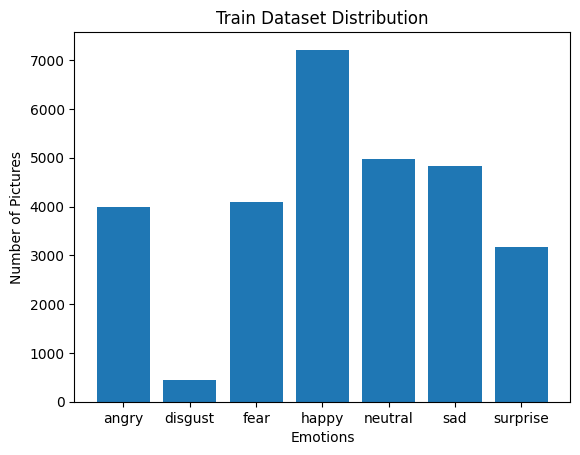

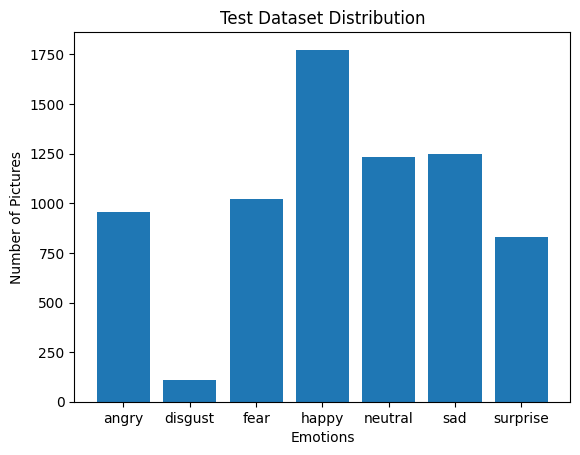

In [11]:
## 1.7 Dataset and label distribution graph

train_nameList, train_numList = labelsCountAndName(train_label)
test_nameList, test_numList = labelsCountAndName(test_label)

plotDistributionBarGraph(train_nameList, train_numList, "Train Dataset Distribution")
plotDistributionBarGraph(test_nameList, test_numList, "Test Dataset Distribution")

<function matplotlib.pyplot.show(close=None, block=None)>

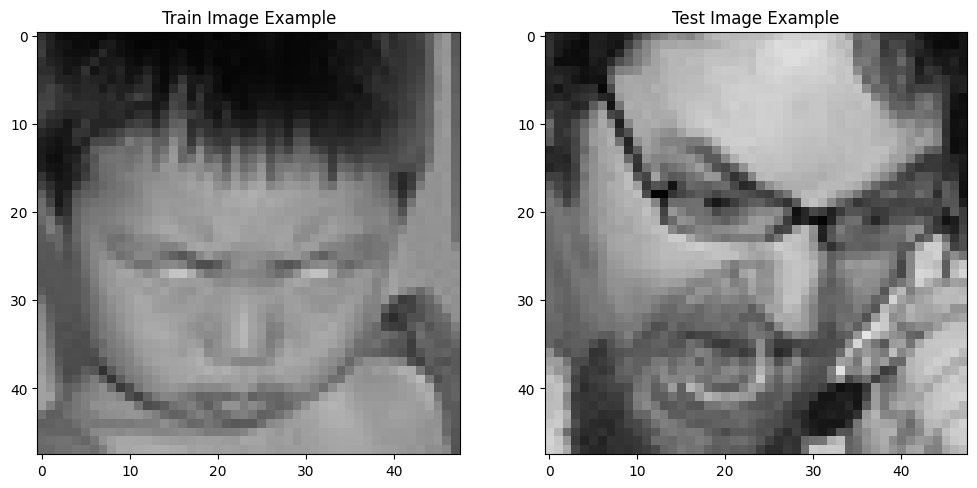

In [12]:
## 1.8 Showcase first image of train and testing dataset

fig = plt.figure(figsize=(12, 7))

trainImgAddress = train_img[0]
testImgAddress = test_img[0]

trainImgData = cv2.imread(trainImgAddress)
testImgData = cv2.imread(testImgAddress)

plt.subplot(1, 2, 1)
plt.imshow(trainImgData, cmap="gray")
plt.title("Train Image Example")

plt.subplot(1, 2, 2)
plt.imshow(testImgData, cmap="gray")
plt.title("Test Image Example")

plt.show

In [13]:
## 1.9 Function of extracting first n images of all emotions for 1.10

def getImagePathAndLabels(numPicPerEmotion):
    picAdd = []
    picLabel = []

    for emotion in train_nameList:
        trainWD = os.path.join(train_directory, emotion)
        testWD = os.path.join(test_directory, emotion)

        numCheck = 0

        for trainImgName in os.listdir(trainWD):
            
            trainImgPath = os.path.join(trainWD, trainImgName)

            picAdd.append(trainImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
        numCheck = 0

        for testImgName in os.listdir(testWD):
            
            testImgPath = os.path.join(testWD, testImgName)

            picAdd.append(testImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
    return picAdd, picLabel


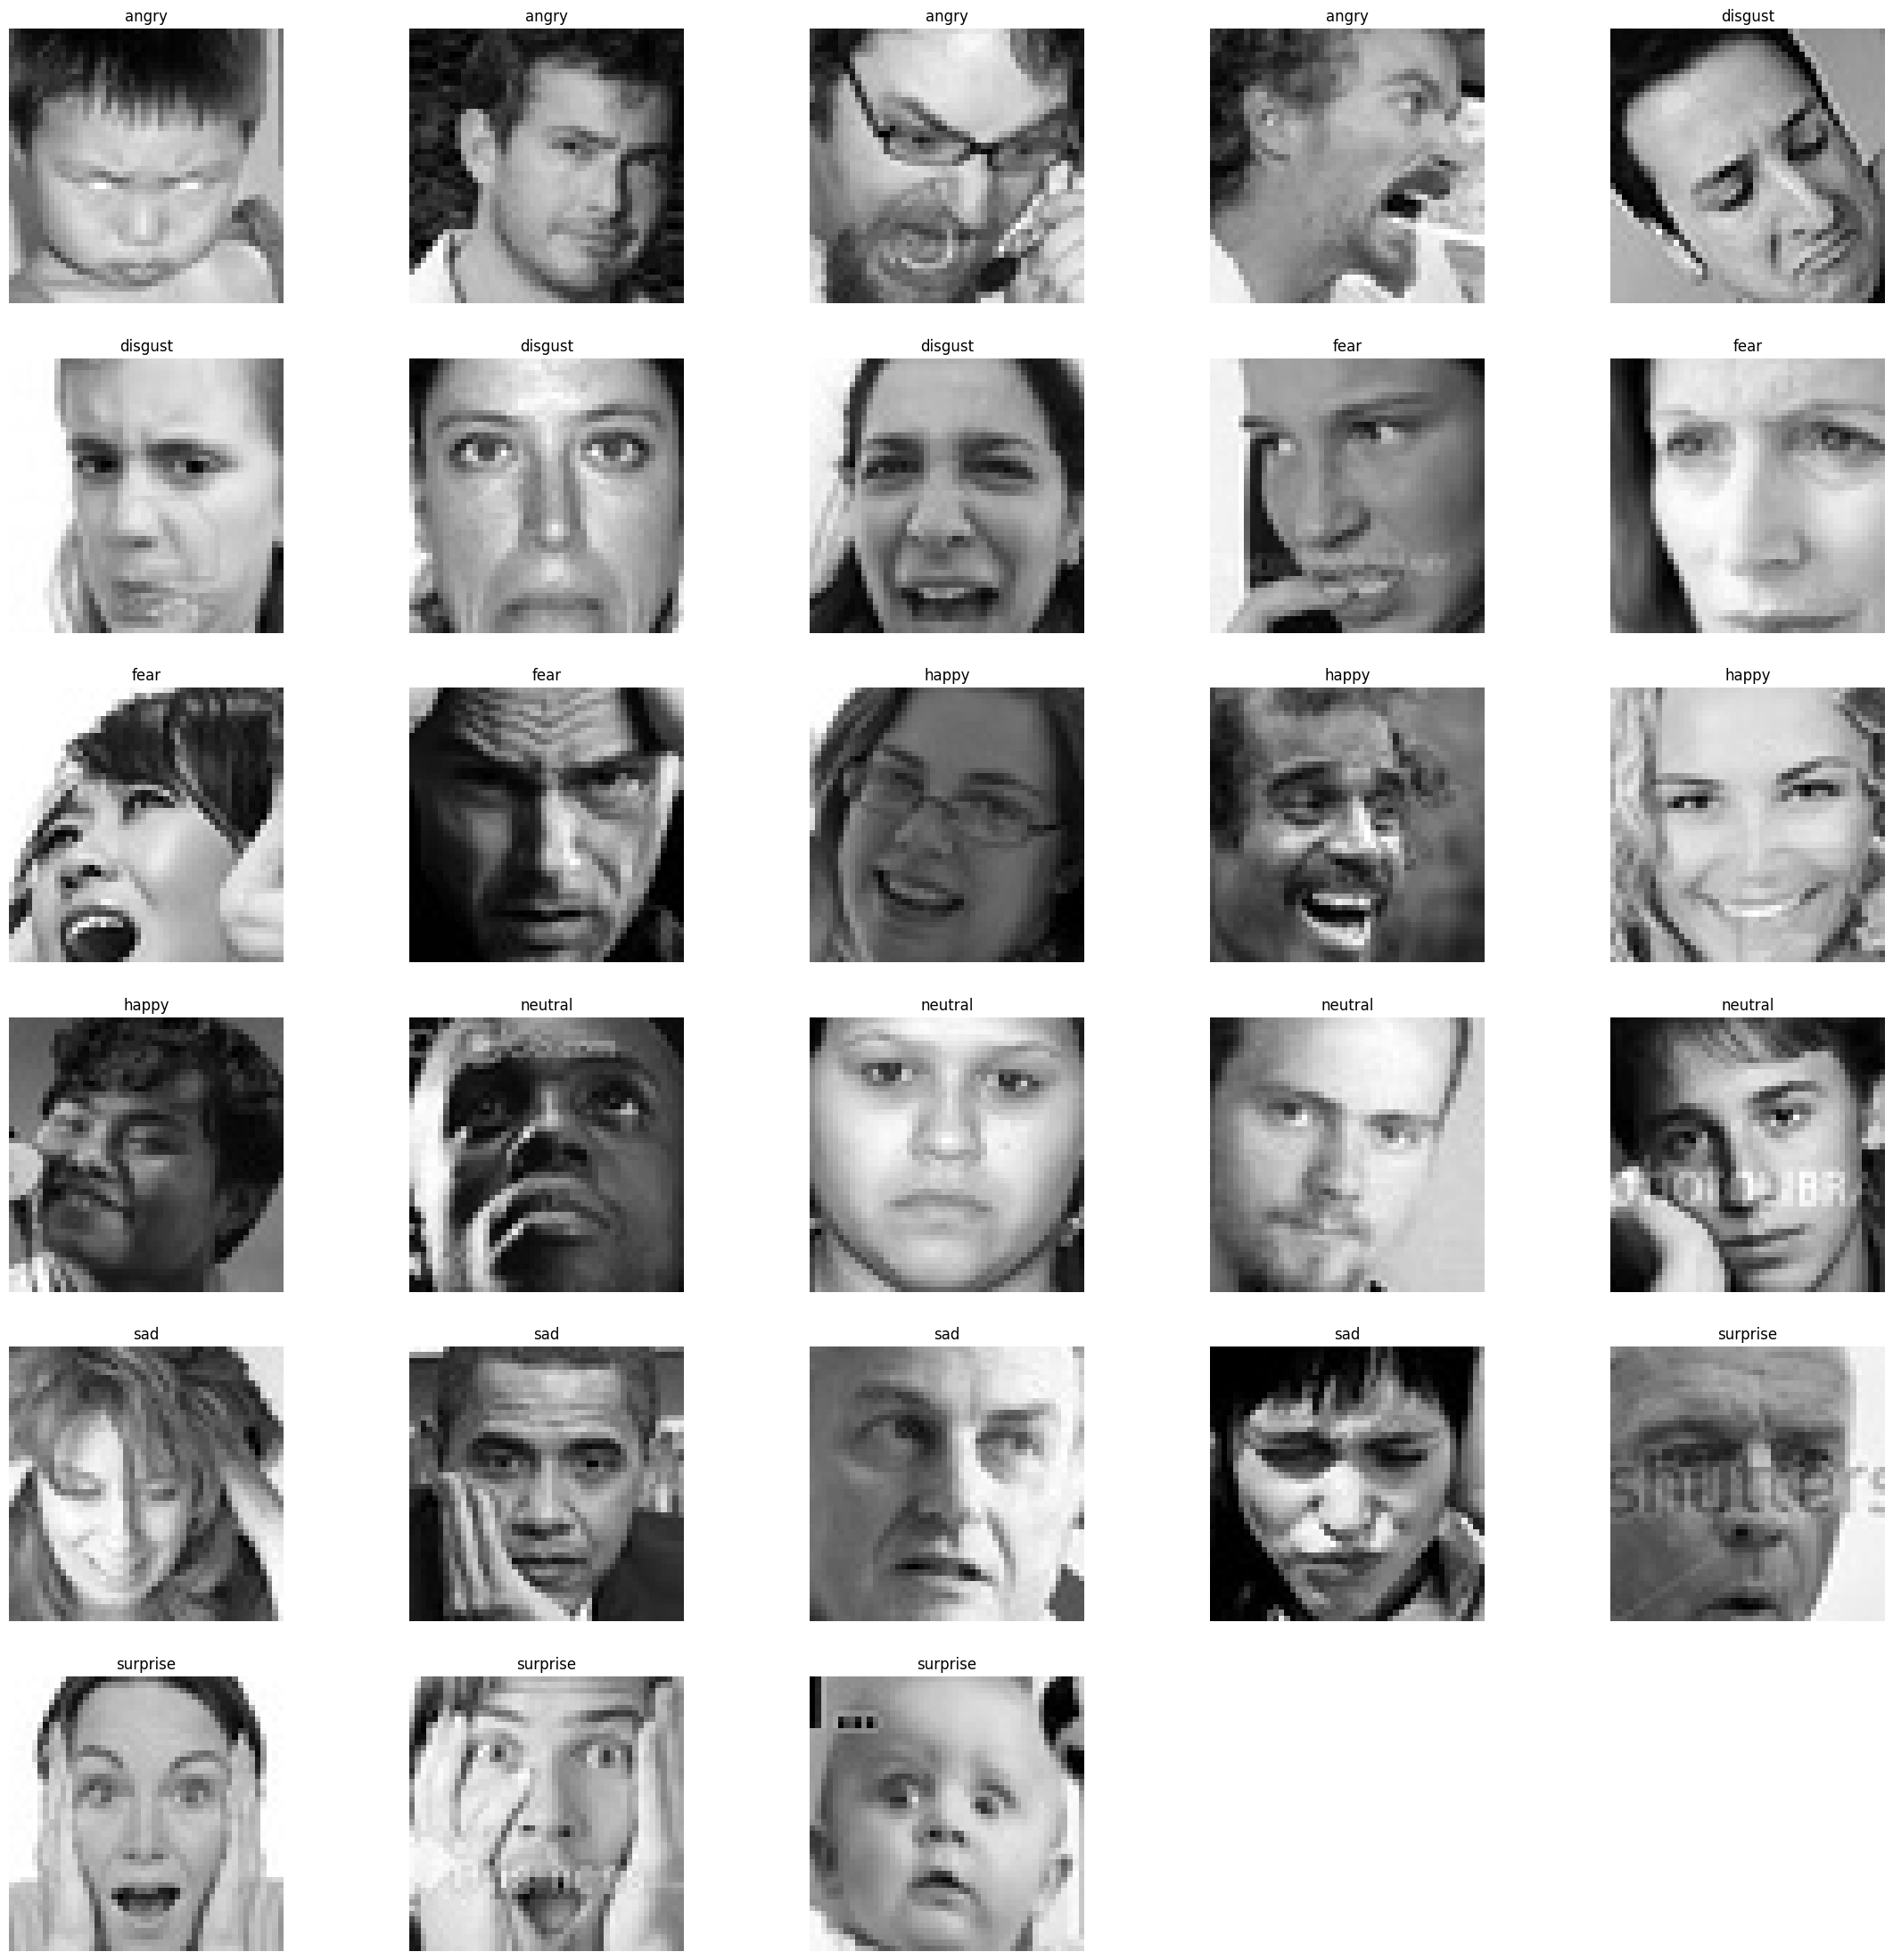

In [14]:
## 1.10 Showcase grid of example images of all emotion labels

import math

numPicPerEmotion = 2

plotSize = numPicPerEmotion * 7 * 2

subplotSize = math.ceil(plotSize / 5)

fig = plt.figure(figsize=(plotSize, plotSize))

picAdd, picLabel = getImagePathAndLabels(numPicPerEmotion)

for i in range(0, plotSize):
    plt.subplot(subplotSize, 5, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(img, cmap="gray")
    plt.title(picLabel[i])
    plt.axis('off')

plt.show()

In [15]:
## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def adjustedFaceDetection(img):
    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle: # x_coord, y_coord, width, height
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 1) # Draw rectangle over detected face

        # (x, y) --> bottom left corner coordinates
        # (x+w, y+h) --> upper right corner coordinates after adding image width and height
        # (255, 255, 255) --> Image color in (R,G,B) which is black color
        # 10 --> Line thickness of 10 pixels

    return face_img

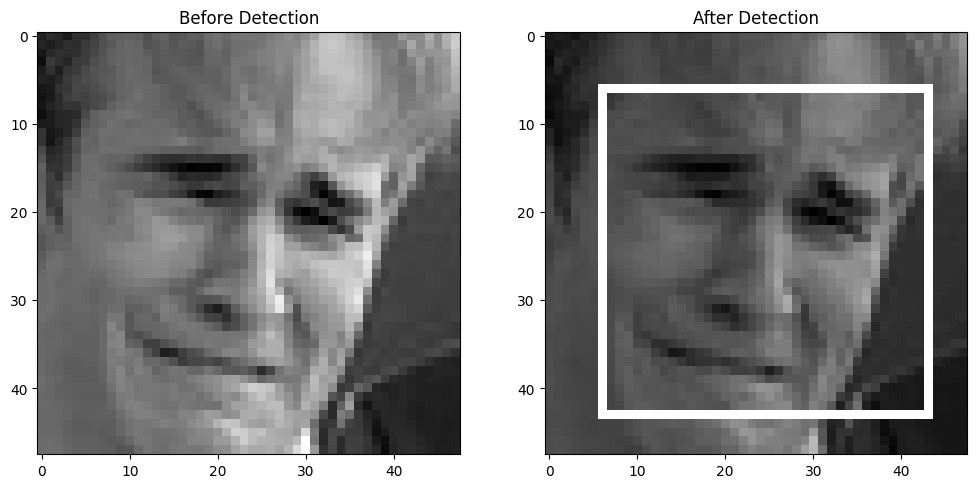

In [16]:
## 1.12 Showcase detected face comparison with original image 

import random

luckyNumber = random.randrange(0, len(train_img))
imgData = plt.imread(train_img[luckyNumber])

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

detectedImgData = adjustedFaceDetection(imgData)

plt.subplot(1, 2, 2)
plt.imshow(detectedImgData, cmap="grey")
plt.title("After Detection")

plt.show()

In [17]:
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)


def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object


    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(48,48))

        return resizedCroppedImg
    
    return img

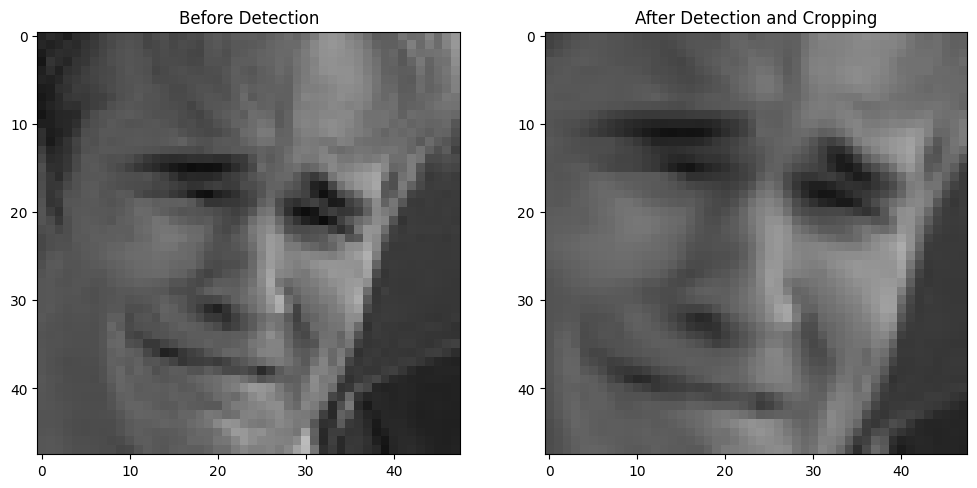

In [18]:
## 1.14 Showcase comparison between original image and cropped detected face image

imgData = cv2.imread(train_img[luckyNumber])

resizedCroppedImg = cropImageOfDetectedFace(imgData)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

plt.subplot(1, 2, 2)
plt.imshow(resizedCroppedImg, cmap="grey")
plt.title("After Detection and Cropping")

plt.show()

Text(0.5, 1.0, 'After Flipping')

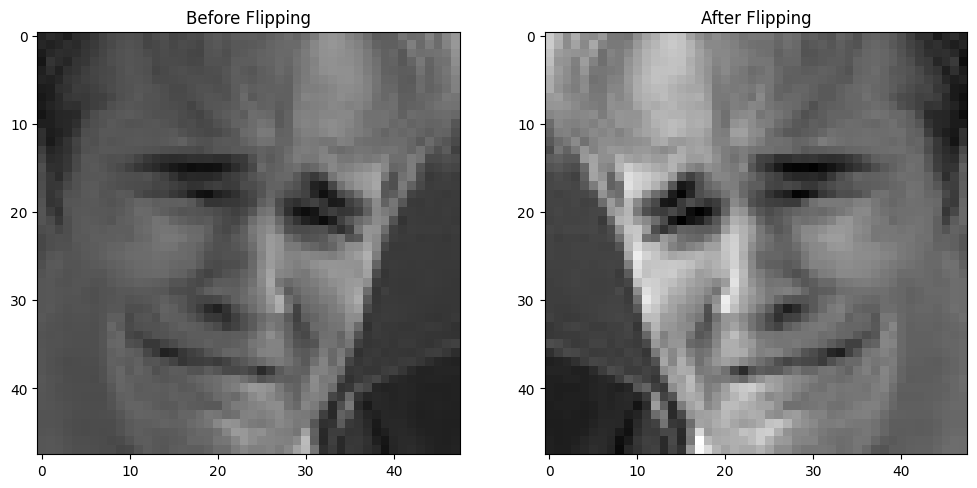

In [19]:
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=1), # 100% chance to flip an image
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Flipping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Flipping")

Text(0.5, 1.0, 'After Cropping')

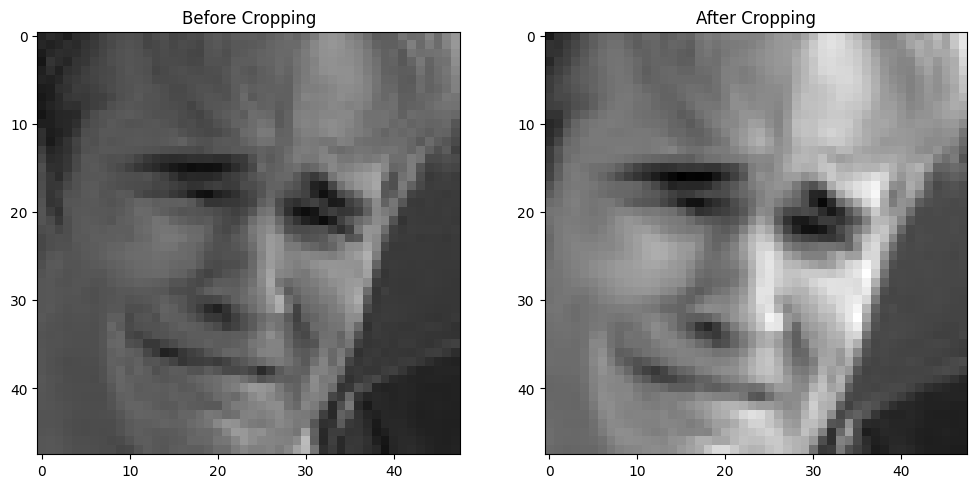

In [20]:
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(48,48), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.8 to 0.9
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Cropping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Cropping")

Text(0.5, 1.0, 'After Affine')

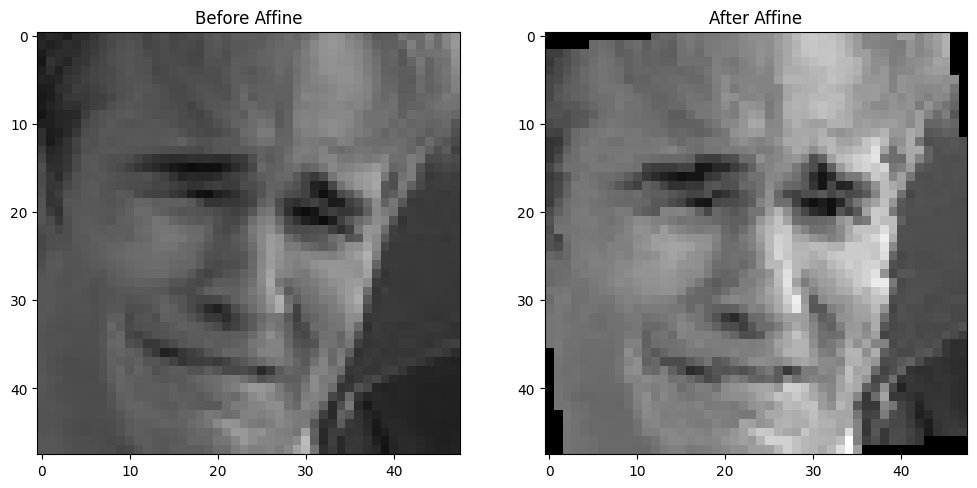

In [21]:
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random affine transformation the input keeping center invariant.
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Affine")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Affine")

Text(0.5, 1.0, 'After Brightness Adjustment')

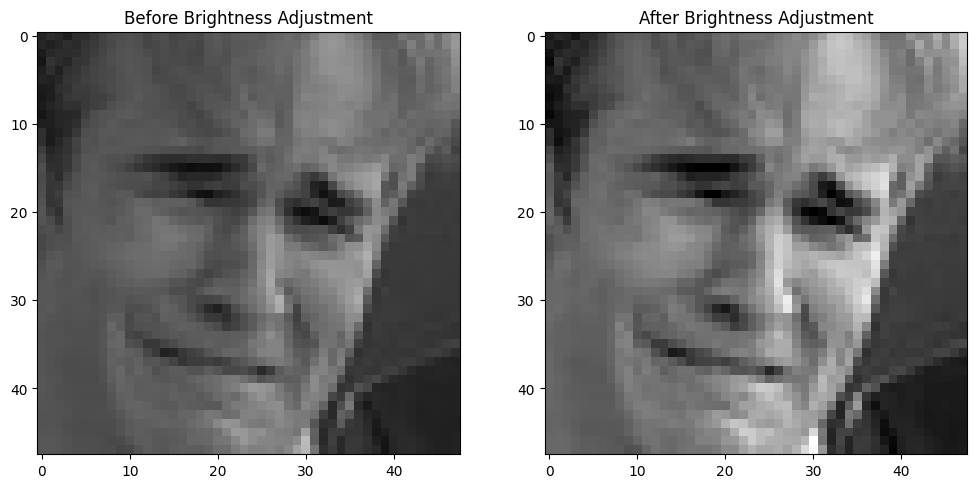

In [22]:
## 1.18 Showcase of comparisons between original image and brightness adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Brightness Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Brightness Adjustment")

Text(0.5, 1.0, 'After Contrast Adjustment')

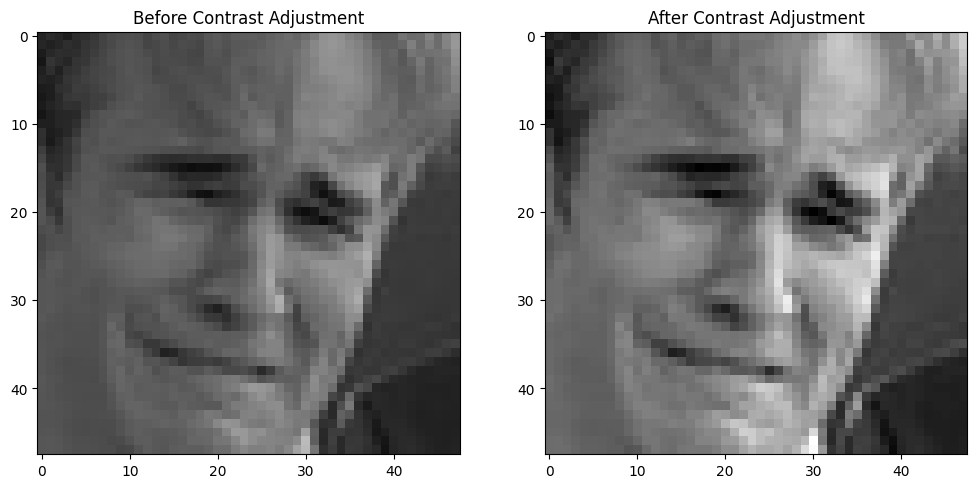

In [23]:
## 1.19 Showcase of comparisons between original image and contrast adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAutocontrast(p=1.0),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Contrast Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Contrast Adjustment")

Transformed image type: <class 'numpy.ndarray'>
Transformed image size: (48, 48)
Transformed image array: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.22192456 0.315729
  0.3892676  0.4548452  0.535655   0.70889133 0.7557086  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


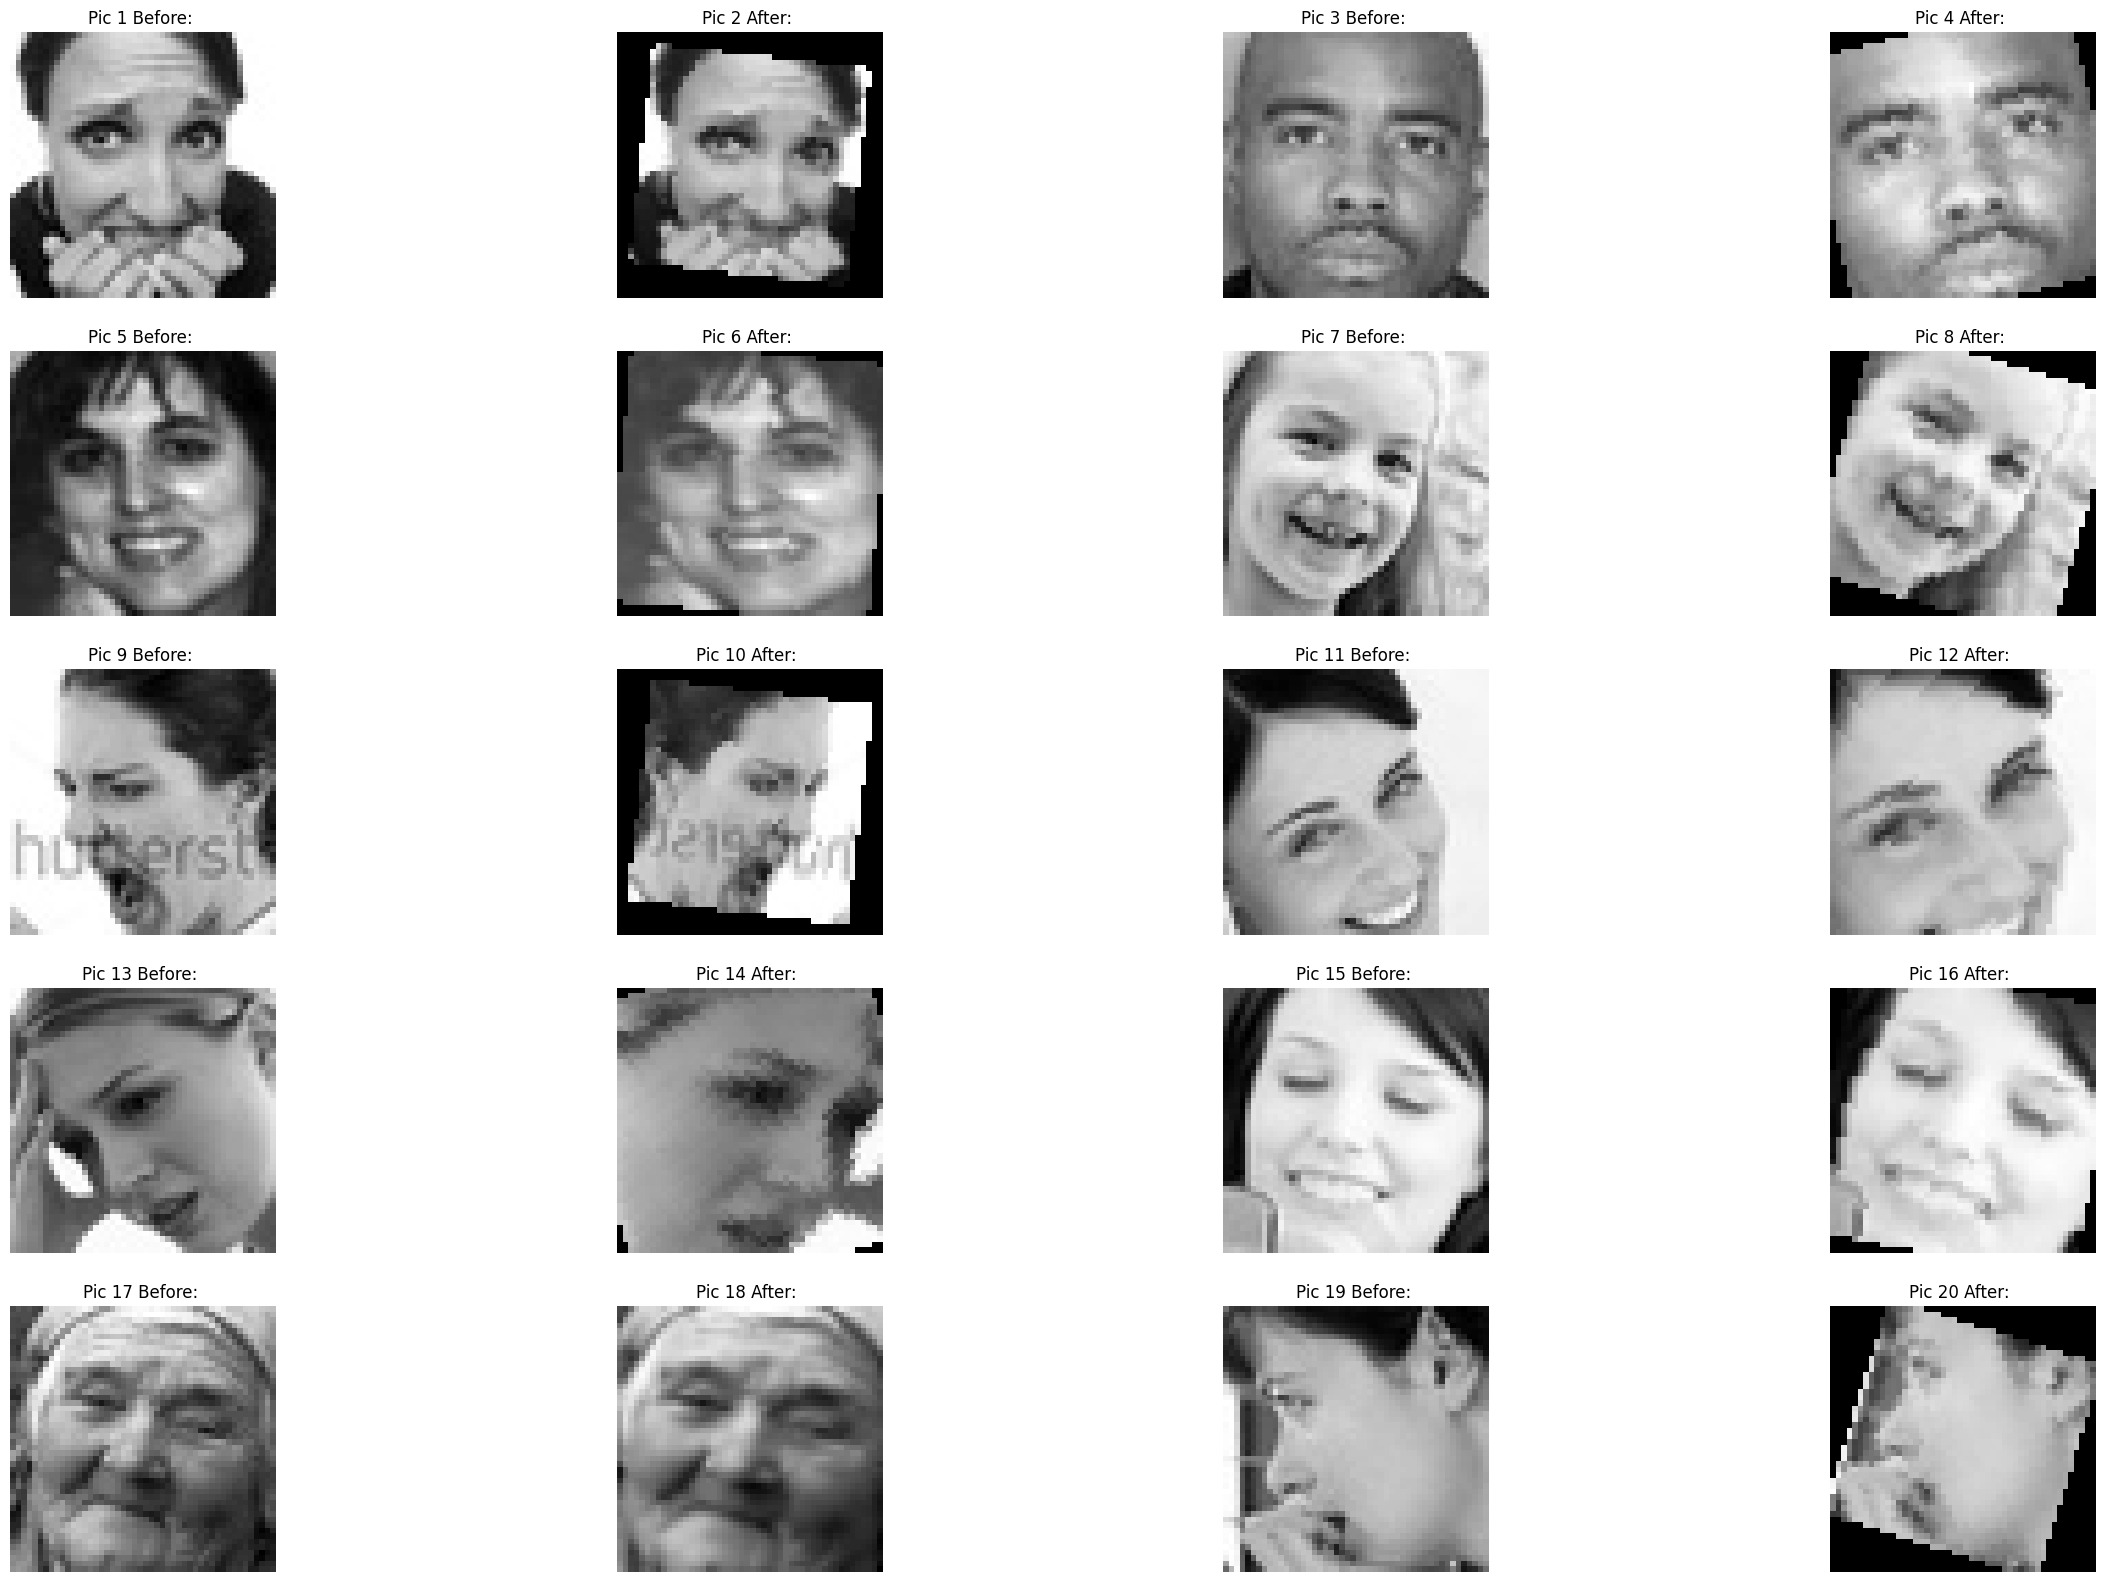

In [24]:
## 1.20 Showcase 10 Transformed Image With Combination of All Transformation 

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
    v2.RandomResizedCrop(size=(48,48), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.08 to 0.1
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
    v2.RandomAutocontrast(p=1.0),
])

images = []

for i in range(0, 10):
    randNum = random.randrange(0, len(train_img))

    originalImg = cv2.imread(train_img[randNum], cv2.IMREAD_GRAYSCALE)
    images.append(originalImg)

    transformedImg = transform(originalImg)
    transformedImg = transformedImg.numpy()[0]
    images.append(transformedImg)

print(f"Transformed image type: {type(transformedImg)}")
print(f"Transformed image size: {transformedImg.shape}")
print(f"Transformed image array: \n{transformedImg[:1]}")

fig = plt.figure(figsize=(30, 20))

for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(images[i], cmap="grey")

    imgName = "Pic " + str((i+1))
    
    if (i+1) % 2 == 0:
        imgName = imgName + " After: "
    else:
        imgName = imgName + " Before: "
    
    plt.title(imgName)

    plt.axis('off')

plt.show()


In [25]:
## 1.21 Whole Function for Entire Preprocessing Step

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(48,48))

        return resizedCroppedImg
    
    return img

def dataPreprocessing(img):
    
    detectedFace = cropImageOfDetectedFace(img)

    transform = v2.Compose([
        v2.ToImage(), # Converting to tensor of type float32
        v2.ToDtype(torch.float32, scale=True),
        v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
        v2.RandomResizedCrop(size=(48,48), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.08 to 0.1
        v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
        v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
        v2.RandomAutocontrast(p=1.0),
    ])

    transformedImgNew = transform(detectedFace)

    return transformedImgNew

Original greyscale image data type: <class 'numpy.ndarray'>
Original greyscale image shape: (48, 48)
Transfomed image type: <class 'torchvision.tv_tensors._image.Image'>
Transformed image shape: torch.Size([1, 48, 48])
Transfomed image after converting to numpy::
Data type: <class 'numpy.ndarray'> 
Shape: (48, 48)


Text(0.5, 1.0, 'After Preprocess')

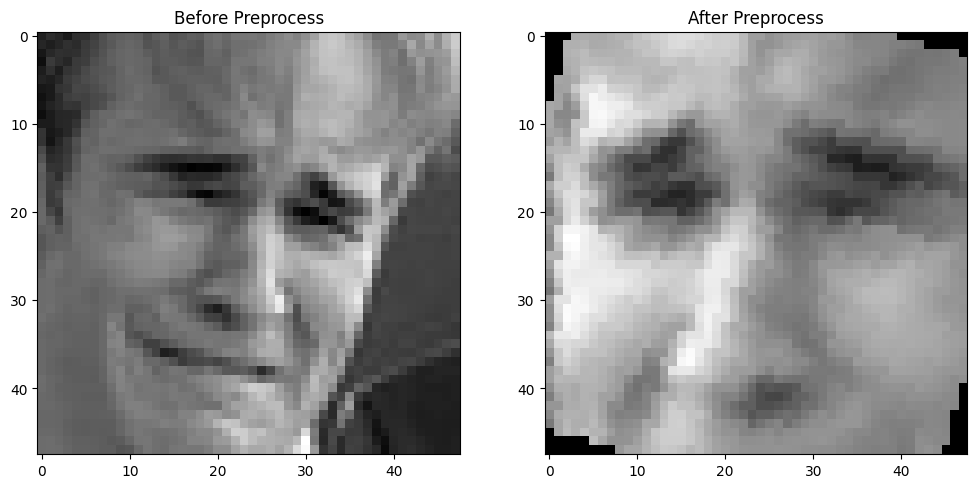

In [26]:
## 1.22 Testing for Whole Preprocess Image for The Dataset

testImgAdd = train_img[luckyNumber]
testImg = cv2.imread(testImgAdd, cv2.IMREAD_GRAYSCALE)

print(f"Original greyscale image data type: {type(testImg)}")
print(f"Original greyscale image shape: {testImg.shape}")

transformed = dataPreprocessing(testImg)
print(f"Transfomed image type: {type(transformed)}")
print(f"Transformed image shape: {transformed.shape}")

transformed = transformed.numpy()[0]

print(f"Transfomed image after converting to numpy::\nData type: {type(transformed)} \nShape: {transformed.shape}")

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(testImg, cmap='grey')
plt.title("Before Preprocess")

plt.subplot(1, 2, 2)
plt.imshow(transformed, cmap="grey")
plt.title("After Preprocess")

Image shape: (48, 48)
Image ::
 [[ 35  44  39  30  45  46  56  67  75  78  80  78  68  76  80  69  72  77
   75  86  90  85  92  93  94  91  97 102 108 101 110 123 144 148 144 131
  123 109  91  93  94 116 107 109 131 109 134 151]
 [ 38  33  38  46  42  52  58  67  73  80  83  80  69  72  77  71  76  74
   70  84  88  82  88  88  90  93 100 104 106 106 119 135 146 150 146 137
  130 116  99  95  95 102 127 106 124 108 131 152]
 [ 28  40  46  44  46  54  61  69  77  82  85  82  76  72  76  73  74  70
   69  83  85  79  88  90  94  98 101 105 105 112 123 136 145 147 144 140
  134 122 107  97 102  88 117 111 113 115 120 146]
 [ 22  52  44  38  52  55  66  71  78  82  85  83  81  72  75  75  74  71
   72  82  82  81  92  93  93  99 100 106 103 114 122 131 144 145 142 141
  135 123 112  97  99  88 101 120 100 112 114 142]
 [ 32  46  33  48  53  62  69  72  74  81  86  83  80  69  73  77  79  76
   75  78  79  85  94  89  86  94  98 106 100 112 122 133 142 145 144 144
  137 125 114  98  96  9

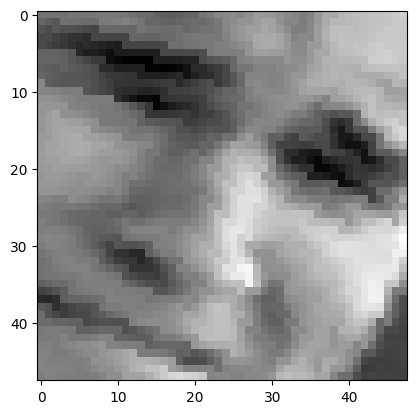

In [27]:
## 1.23 Testing for image saving mechanism

imgPath = train_img[luckyNumber]

img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

print(f"Image shape: {img.shape}")
print(f"Image ::\n {img[:5]}")

processedImg = dataPreprocessing(img)

print(f"1. Shape: {processedImg.shape}")
print(f"1. Array: {processedImg[:5]}")

plt_img = processedImg.numpy()[0]

# Conversion from numpy float to uint8 [0-255]
if plt_img.dtype != np.uint8:
    plt_img = (plt_img * 255).astype(np.uint8)

print(f"Plt img size: {plt_img.shape}")
print(f"Plt img type: {type(plt_img)} and variable type: {plt_img.dtype}")
print(f"Plt img array: {plt_img[:1]}")

plt.imshow(plt_img, cmap="grey")

processedImg = Image.fromarray(plt_img) # Take first row only

processedImg = processedImg.convert("L")

processedImg.show()

In [28]:
## 1.24 Preprocess and Save Images into Dataset

def datasetProcessing(directory, folderName):

    processedDataFoldername = os.path.join(current_wd, "processed_data")

    if not(os.path.isdir(processedDataFoldername)):
        os.mkdir(processedDataFoldername)
    
    trainOrTestFoldername = os.path.join(processedDataFoldername, folderName)
    
    if not(os.path.isdir(trainOrTestFoldername)):
        os.mkdir(trainOrTestFoldername)
    
    counter = 1

    for emotion in os.listdir(directory):
        emotionFolderDir = os.path.join(directory, emotion)

        newEmotionFolderDir = os.path.join(trainOrTestFoldername, emotion)

        if not(os.path.isdir(newEmotionFolderDir)):
            os.mkdir(newEmotionFolderDir)
        
        for filename in os.listdir(emotionFolderDir):
            imgPath = os.path.join(emotionFolderDir, filename)
            
            img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

            processedImg = dataPreprocessing(img)

            processedImg = processedImg.numpy()[0] # Take first row only

            if processedImg.dtype != np.uint8:
                processedImg = (processedImg * 255).astype(np.uint8)

            processedImg = Image.fromarray(processedImg) 

            processedImg = processedImg.convert("L") # Convert image from float-format to single-channel greyscale format

            newFilename = str(counter) + ".png"

            processedImgPath = os.path.join(newEmotionFolderDir, newFilename)

            processedImg.save(processedImgPath)

            counter += 1
        
        print(f"\nThe {folderName} -> '{emotion}' images has been processed and saved")

existingPath = os.path.join(current_wd, "processed_data", "train", "disgust", "1.png")

if not(os.path.isdir(existingPath)):
    datasetProcessing(train_directory, "train")

    print("\nThe training dataset has been processed and saved.\n")

    datasetProcessing(test_directory, "test")

    print("\nThe testing dataset has been processed and saved.\n")

else:
    print("The dataset has been preprocessed before.\n Please check the repository")


The train -> 'angry' images has been processed and saved

The train -> 'disgust' images has been processed and saved

The train -> 'fear' images has been processed and saved

The train -> 'happy' images has been processed and saved

The train -> 'neutral' images has been processed and saved

The train -> 'sad' images has been processed and saved

The train -> 'surprise' images has been processed and saved

The training dataset has been processed and saved.


The test -> 'angry' images has been processed and saved

The test -> 'disgust' images has been processed and saved

The test -> 'fear' images has been processed and saved

The test -> 'happy' images has been processed and saved

The test -> 'neutral' images has been processed and saved

The test -> 'sad' images has been processed and saved

The test -> 'surprise' images has been processed and saved

The testing dataset has been processed and saved.

